### **Initialization**
* I use these 3 lines of code on top of my each notebook because it won't cause any trouble while reloading or reworking on the Project or Problem. And the third line of code helps to make visualization within the Notebook.

In [1]:
# Initialization
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**Downloading the Dependencies**
* I prefer to download all necessary Libraries and Dependencies on one particular cell which mainly focus on Libraries and Dependencies.

In [25]:
# Downloading all the Libraries and Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

**Reading the Data**
* I have manually downloaded the Data. The act of loading and reading the Data might be different in different platforms.

In [5]:
# Loading the Data
# Creating DataFrame from the csv file
PATH = r"C:\\Users\\DELL\\Downloads\\Austin Animal Center Data (EDA)\\Data.csv"
df = pd.read_csv(PATH)

# Observing the DataFrame
df.head(10)

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days
0,A794011,1.0,Neutered Male,Chunk,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,730,730
1,A776359,1.0,Neutered Male,Gizmo,7201 Levander Loop in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,White/Brown,365,365
2,A674754,0.0,Intact Male,NaN,12034 Research in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,6,6
3,A689724,1.0,Neutered Male,*Donatello,2300 Waterway Bnd in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black,60,60
4,A680969,1.0,Neutered Male,*Zeus,4701 Staggerbrush Rd in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,White/Orange Tabby,7,60
5,A684617,0.0,Intact Female,NaN,10015 Lake Creek Pkwy in Austin (TX),Stray,Normal,Cat,Intact Female,Domestic Shorthair Mix,Black,730,730
6,A742354,1.0,Neutered Male,Artemis,9200 N Plaza Dr in Austin (TX),Stray,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Blue/White,2555,2555
7,A681036,0.0,Intact Male,NaN,Hill Croft Drive & Loyola Lane in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Brown Tabby,2,2
8,A803149,0.0,Intact Male,*Birch,2607 Garrettson Drive in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair,Brown Tabby,14,21
9,A773792,0.0,Intact Male,NaN,8711 Johnny Morris in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,28,28


### **Exploratory Data Analysis**

**Statistical Exploration**

In [6]:
# Observing the rows and columns of DataFrame or the shape of DataFrame
print(f"The shape of DataFrame is {df.shape}")

The shape of DataFrame is (95485, 13)


In [7]:
# Observing the datatypes and null values in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95485 entries, 0 to 95484
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pet ID                 95485 non-null  object 
 1   Outcome Type           95485 non-null  float64
 2   Sex upon Outcome       95484 non-null  object 
 3   Name                   59138 non-null  object 
 4   Found Location         95485 non-null  object 
 5   Intake Type            95485 non-null  object 
 6   Intake Condition       95485 non-null  object 
 7   Pet Type               95485 non-null  object 
 8   Sex upon Intake        95484 non-null  object 
 9   Breed                  95485 non-null  object 
 10  Color                  95485 non-null  object 
 11  Age upon Intake Days   95485 non-null  int64  
 12  Age upon Outcome Days  95485 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 9.5+ MB


In [8]:
# Printing the basic statistics for the Numerical columns
df.describe()

,Outcome Type,Age upon Intake Days,Age upon Outcome Days
count,95485.000000,95485.000000,95485.000000
mean,0.564005,703.436959,717.757313
std,0.495889,1052.252197,1055.023160
min,0.000000,0.000000,0.000000
25%,0.000000,30.000000,60.000000
50%,1.000000,365.000000,365.000000
75%,1.000000,730.000000,730.000000
max,1.000000,9125.000000,9125.000000


In [9]:
# Printing all the columns of the DataFrame
df.columns

Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')

**Separating the Features and Target Columns**

In [10]:
# Separating the features and target columns
features = df.columns.drop("Outcome Type")
target = "Outcome Type"

print(f"Model Features: {features}")
print(f"Model Target: {target}")

Model Features: Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color',
       'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')
Model Target: Outcome Type


**Features Processing**
* I will further explore the features of the DataFrame to separate whether the columns is Categorical or Numerical. Note that some integer valued features could actually be Categorical features and some Categorical features might be text features.

In [11]:
# Selecting the Numerical Features
numerical_features = df[features].select_dtypes(include = np.number).columns
print(f"Numerical Features: {numerical_features}")

print(" ")

# Selecting the Categorical Features
categorical_features = df[features].select_dtypes(include = "object").columns
print(f"Categorical Features: {categorical_features}")

Numerical Features: Index(['Age upon Intake Days', 'Age upon Outcome Days'], dtype='object')
 
Categorical Features: Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color'],
      dtype='object')


### **Plots:**
* I will observe the Data using plots. These plots ignores the missing values. Dealing with the missing values will be observed later in the Notebook.

**Bar Plots**
* Bar Plots show the plots of Categorical data. The value_counts function yields the counts of each unique value. It is very useful while dealing with categorical variables.

In [12]:
# Looking at the distribution of Model Target
df[target].value_counts()

1.0    53854
0.0    41631
Name: Outcome Type, dtype: int64

* The **plot.bar()** function along with **value_counts()** function makes the bar plots of the values.

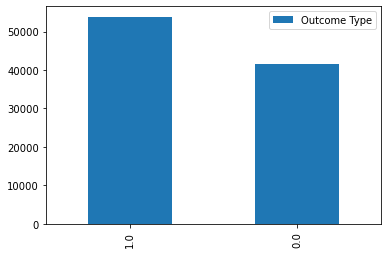

In [13]:
# Plotting the barplot of the distribution of the Model's Target.
df[target].value_counts().plot.bar()
plt.legend()
plt.show()

* From the target plots, it can be seen that whether or not it is an imbalanced datasets that one particular type is dominating the other ones. Handling class imbalance is highly recommended because the model performance can be greatly impacted from it. Downsampling the dominant and upsampling the rare part will be an import step to reduce the class imbalance.

**Exploring the Numerical Features**
* Exploring the unique values per features in CategoricalNumerical Features.

**Histograms**
* Histograms show the distribution of numeric data in which data is divide into bins or buckets.

Age upon Intake Days


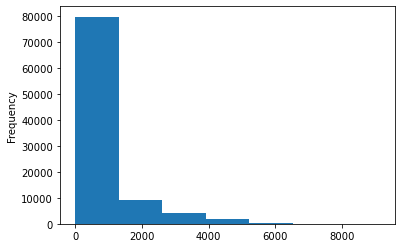

Age upon Outcome Days


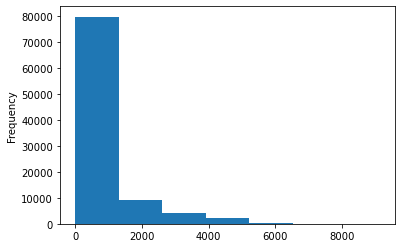

In [14]:
# Plotting the distribution of Numeric data
for N in numerical_features:
    print(N)
    df[N].plot.hist(bins = 7)
    plt.show()

* If, incase of some Histograms, the values are heavily placed in the first bin, the best step is to look for the outliers. Checking the min-max values of those particular features and exploring the value ranges.

In [15]:
# Exploring the value ranges of the Numerical Features
for N in numerical_features:
    print(N)
    print(f"Minimum: {df[N].min()} and Maximum: {df[N].max()}")

Age upon Intake Days
Minimum: 0 and Maximum: 9125
Age upon Outcome Days
Minimum: 0 and Maximum: 9125


* With the help of value_counts() function, it is possible to increase the bins of the Histogram.

In [16]:
# Using value_counts function to observe the refined view of the numerical features.
for N in numerical_features:
    print(N)
    print(df[N].value_counts(bins = 10, sort = False))
    plt.show()

Age upon Intake Days
(-9.126, 912.5]     74835
(912.5, 1825.0]     10647
(1825.0, 2737.5]     3471
(2737.5, 3650.0]     3998
(3650.0, 4562.5]     1234
(4562.5, 5475.0]     1031
(5475.0, 6387.5]      183
(6387.5, 7300.0]       79
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: Age upon Intake Days, dtype: int64
Age upon Outcome Days
(-9.126, 912.5]     74642
(912.5, 1825.0]     10699
(1825.0, 2737.5]     3465
(2737.5, 3650.0]     4080
(3650.0, 4562.5]     1263
(4562.5, 5475.0]     1061
(5475.0, 6387.5]      187
(6387.5, 7300.0]       81
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: Age upon Outcome Days, dtype: int64


* If any outliers or wrong values are identified then dropping them could improve the numerical values histograms, and later overall model performance. While a good rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, other rules for removing 'outliers' should be considered as well. For example, removing any values in the upper 1%.

* Checking the missing values in Numerical Features.

In [17]:
# Checking the missing values in Numerical Features
df[numerical_features].isna().sum()

Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64

* The easiest way to impute the Numerical Values is to get the average for the corresponding column and to impute the value in the missing values.

### **Training Data and Testing Data**
* Splitting the Data into 90% training and 10% testing.

In [18]:
# Splitting the Data into 90% training and 10% testing
train_data, test_data = train_test_split(df, test_size = 0.1, shuffle = True, random_state = 42)

# Observing the Train Data and Test Data
train_data.shape, test_data.shape

((85936, 13), (9549, 13))

**Target Balancing**

* Observing the Target Features in Training Data and Testing Data.

In [19]:
# Training Data
print(f"Class 0 in training data is {sum(train_data[target] == 0)}")
print(f"Class 1 in training data is {sum(train_data[target] == 1)}")

# Testing Data
print(f"Class 0 in testing data is {sum(test_data[target] == 0)}")
print(f"Class 1 in testing data is {sum(test_data[target] == 1)}")

Class 0 in training data is 37438
Class 1 in training data is 48498
Class 0 in testing data is 4193
Class 1 in testing data is 5356


* Fixing the imbalance only in Training Data.

In [20]:
# Fixing the Imbalance only in Training Data
class_0 = train_data[train_data[target] == 0]
class_1 = train_data[train_data[target] == 1]

unsample_class_0 = class_0.sample(n = len(class_1), replace = True, random_state = 42)

# Preparing the Final Training Data
train_data = shuffle(pd.concat([class_1, unsample_class_0]))

**Observing the Final Training Data**

In [21]:
# Training Data
print(f"Shape of Training Data is {train_data.shape}")
print(f"Class 0 in training data is {sum(train_data[target] == 0)}")
print(f"Class 1 in training data is {sum(train_data[target] == 1)}")

Shape of Training Data is (96996, 13)
Class 0 in training data is 48498
Class 1 in training data is 48498


### **Data Processing with Pipeline**
* Building Pipeline to impute the missing values with mean value using SimpleImputer, scale the numerical features to have similar orders of magnitude by bringing them into 0-1 range with MinMaxScaler.

In [22]:
# Creating Pipeline
classifier = Pipeline([
    ('imputer', SimpleImputer(strategy = "mean")),
    ('scaler', MinMaxScaler()),
    ('estimator', KNeighborsClassifier(n_neighbors = 5))
])

# Visualizing the Pipeline
from sklearn import set_config
set_config(display = "diagram")
classifier

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier())])

**Training the Classifier**
* Training the Classifier in Training Data 

In [23]:
# Training the Classifier
X_train = train_data[numerical_features]
y_train = train_data[target]

# Fitting the Classifier
classifier.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier())])

### **Model Evaluation**
* Checking the accuracy in Training Data

In [26]:
# Using the fitted model to make predictions on the same data
train_predict = classifier.predict(X_train)

print(f"Model evaluation on Training Data:\n {confusion_matrix(y_train, train_predict)}")
print(f"Classification Report:\n {classification_report(y_train, train_predict)}")
print(f"Training accuracy:\n {accuracy_score(y_train, train_predict)}")

Model evaluation on Training Data:
 [[22679 25819]
 [12180 36318]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.65      0.47      0.54     48498
         1.0       0.58      0.75      0.66     48498

    accuracy                           0.61     96996
   macro avg       0.62      0.61      0.60     96996
weighted avg       0.62      0.61      0.60     96996

Training accuracy:
 0.6082415769722462


* Checking the accuracy in Testing Data

In [27]:
# Using the fitted model to make predictions on testing data
X_test = test_data[numerical_features]
y_test = test_data[target]

test_predict = classifier.predict(X_test)

print(f"Model evaluation on Testing Data:\n {confusion_matrix(y_test, test_predict)}")
print(f"Classification Report:\n {classification_report(y_test, test_predict)}")
print(f"Testing accuracy:\n {accuracy_score(y_test, test_predict)}")

Model evaluation on Testing Data:
 [[1937 2256]
 [1286 4070]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.46      0.52      4193
         1.0       0.64      0.76      0.70      5356

    accuracy                           0.63      9549
   macro avg       0.62      0.61      0.61      9549
weighted avg       0.62      0.63      0.62      9549

Testing accuracy:
 0.6290711069221908
